# Import Libraries

In [54]:
#for managing dataframes
import pandas as pd

#for numerical operations
import numpy as np
 
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for imputations
import statistics

#for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

## Reading Datasets

In [2]:
#load dataset and reading the train dataset
loan_train = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
loan_test = pd.read_csv(("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv"))
loan_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#reading the test dataset
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
#checking features datatypes
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [6]:
#checking statistics
loan_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
loan_test.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [8]:
#checking for unique values of each feature
loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
loan_test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

From this we can see that there is no difference in categorical attributes of both train and test sets.

In [10]:
#checking for missing values
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We will be imputing missing values after performing EDA.

## EDA
We will be performing Bivariate Analysis

### Gender

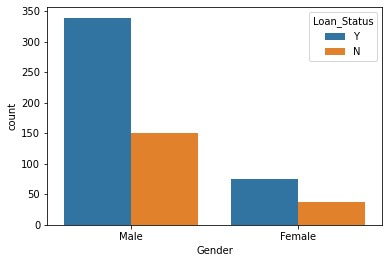

In [12]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_train);

### Married

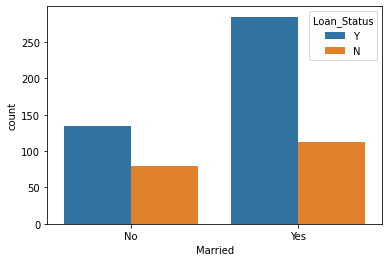

In [13]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_train);

### Dependents

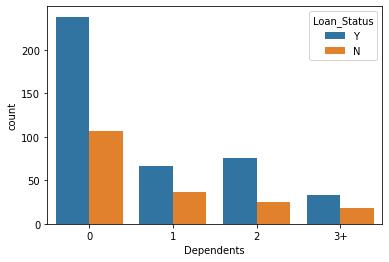

In [14]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_train);

### Education

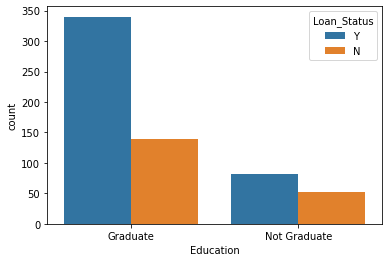

In [15]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_train);

### Self Employed

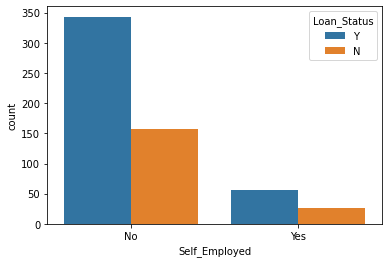

In [16]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_train);

### ApplicantIncome

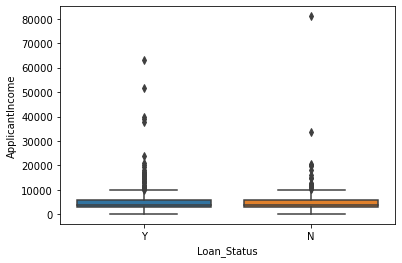

In [17]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_train);

### CoapplicantIncome

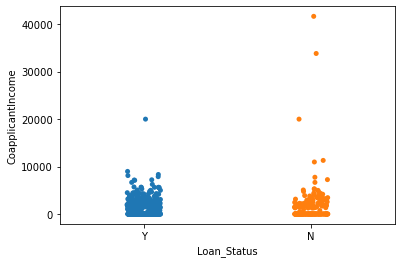

In [18]:
sns.stripplot(x='Loan_Status',y='CoapplicantIncome',data=loan_train);

### LoanAmount

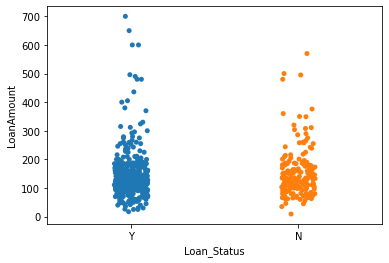

In [19]:
sns.stripplot(x='Loan_Status',y='LoanAmount',data=loan_train);

### Loan_Amount_Term

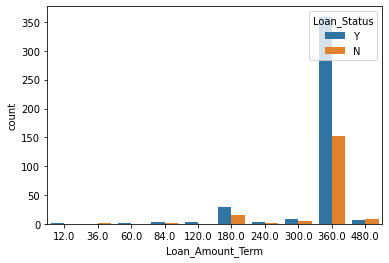

In [20]:
sns.countplot(hue='Loan_Status',x='Loan_Amount_Term',data=loan_train);

### Credit_History

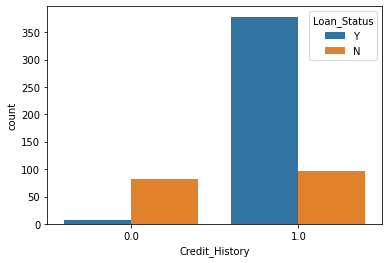

In [21]:
sns.countplot(hue='Loan_Status',x='Credit_History',data=loan_train);

### Property_Area

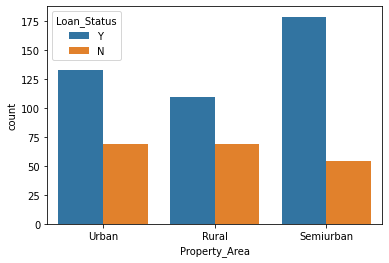

In [22]:
sns.countplot(hue='Loan_Status',x='Property_Area',data=loan_train);

### Loan_Status (univariate)

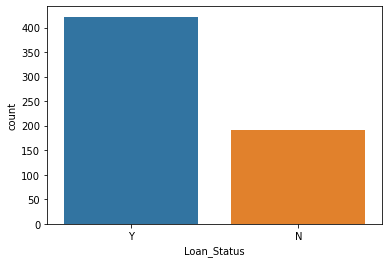

In [23]:
sns.countplot(x='Loan_Status',data=loan_train);

## Imputation

In [24]:
#Median Imputaion
statistics.median_low(loan_train['LoanAmount'])

280.0

In [25]:
loan_train['LoanAmount'].fillna(280.0,inplace=True)

In [26]:
statistics.median_low(loan_test['LoanAmount'])

135.0

In [27]:
loan_test['LoanAmount'].fillna(135.0,inplace=True)

In [28]:
#Mode Imputaion
loan_train['Gender'] = loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_train['Married'] = loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_train['Dependents'] = loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0])
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0])
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])

In [29]:
loan_test['Gender'] = loan_test['Gender'].fillna(loan_test['Gender'].mode()[0])
loan_test['Dependents'] = loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0])
loan_test['Self_Employed'] = loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0])
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0])
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0])

We will replace `3+` in **Dependents**.

In [30]:
loan_train['Dependents']=loan_train['Dependents'].replace("3+","3")
loan_test['Dependents']=loan_test['Dependents'].replace("3+","3")

loan_train['Dependents']=loan_train['Dependents'].astype('int64')
loan_test['Dependents']=loan_test['Dependents'].astype('int64')

## Dummification of categorical variables

In [31]:
#on train set
#one hot encoding each categorical attribute
dummy_tr_1=pd.get_dummies(loan_train['Gender'],drop_first=True,prefix='Gender',prefix_sep='_')
dummy_tr_2=pd.get_dummies(loan_train['Married'],drop_first=True,prefix='Married',prefix_sep='_')
dummy_tr_3=pd.get_dummies(loan_train['Education'],drop_first=True,prefix='Education',prefix_sep='_')
dummy_tr_4=pd.get_dummies(loan_train['Self_Employed'],drop_first=True,prefix='Self_Employed',prefix_sep='_')
dummy_tr_5=pd.get_dummies(loan_train['Property_Area'],drop_first=True,prefix='Property_Area',prefix_sep='_')

#concatenating one hot encoded attributes with original train set
loan_train=pd.concat([loan_train,dummy_tr_1,dummy_tr_2,dummy_tr_3,dummy_tr_4,dummy_tr_5],axis=1)

#Removing the original columns (one hot encoded attributes)
loan_train=loan_train.drop(columns=['Property_Area','Gender','Married','Self_Employed','Education'])

In [32]:
#on test set
dummy_te_1=pd.get_dummies(loan_test['Gender'],drop_first=True,prefix='Gender',prefix_sep='_')
dummy_te_2=pd.get_dummies(loan_test['Married'],drop_first=True,prefix='Married',prefix_sep='_')
dummy_te_3=pd.get_dummies(loan_test['Education'],drop_first=True,prefix='Education',prefix_sep='_')
dummy_te_4=pd.get_dummies(loan_test['Self_Employed'],drop_first=True,prefix='Self_Employed',prefix_sep='_')
dummy_te_5=pd.get_dummies(loan_test['Property_Area'],drop_first=True,prefix='Property_Area',prefix_sep='_')
loan_test=pd.concat([loan_test,dummy_te_1,dummy_te_2,dummy_te_3,dummy_te_4,dummy_te_5],axis=1)
loan_test=loan_test.drop(columns=['Property_Area','Gender','Married','Self_Employed','Education'])

## Assinging X and y

In [33]:
X = loan_train.drop(columns=['Loan_ID','Loan_Status'])
y = loan_train['Loan_Status']

test = loan_test.drop(columns=['Loan_ID'])

## Train Validation Split

In [34]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,
                                             random_state=77)

## Model Building

### Logistic Regression

In [35]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

y_pred_LR_tr=LR.predict(X_train)
y_pred_LR_val=LR.predict(X_val)

ac_lr_tr=accuracy_score(y_train,y_pred_LR_tr)
ac_lr_val=accuracy_score(y_val,y_pred_LR_val)

print('Train Accuracy')
print(ac_lr_tr*100)
print('Validation Accuracy')
print(ac_lr_val*100)

Train Accuracy
80.43478260869566
Validation Accuracy
83.76623376623377


#### GridSearchCV (Logistic Regression)

In [36]:
LR_GS=LogisticRegression()

scorers = {'accuracy_score': make_scorer(accuracy_score)}

params_grid_LR={'class_weight':['balanced',None], #2
                'C':[0.00001,0.0001,0.001,0.1,1,10,100], #7
                'solver':['newton-cg','sag','lbfgs']} #3

grid_search_LR=GridSearchCV(LR_GS,params_grid_LR,
                            n_jobs=-1,scoring=scorers,cv=5,refit='accuracy_score')

grid_search_LR.fit(X_train,y_train)
grid_search_LR.best_params_

{'C': 10, 'class_weight': None, 'solver': 'newton-cg'}

Now we will apply above parameters

In [37]:
LR_after=LogisticRegression(C=10,class_weight=None,solver='newton-cg')
LR_after.fit(X_train,y_train)
y_pred_LR_after_val=LR_after.predict(X_val)
y_pred_LR_after_tr=LR_after.predict(X_train)

ac_lr_tuned_val=accuracy_score(y_val,y_pred_LR_after_val)
ac_lr_tuned_tr=accuracy_score(y_train,y_pred_LR_after_tr)

print('Train Accuracy')
print(ac_lr_tuned_tr*100)
print('Validation Accuracy')
print(ac_lr_tuned_val*100)

Train Accuracy
81.08695652173913
Validation Accuracy
82.46753246753246


### Decision Tree

In [38]:
Dt=DecisionTreeClassifier(max_depth=3,criterion='entropy')
Dt.fit(X_train,y_train)

y_pred_Dt_tr=Dt.predict(X_train)
y_pred_Dt_val=Dt.predict(X_val)

ac_Dt_tr=accuracy_score(y_train,y_pred_Dt_tr)
ac_Dt_val=accuracy_score(y_val,y_pred_Dt_val)

print('Train Accuracy')
print(ac_Dt_tr*100)
print('Validation Accuracy')
print(ac_Dt_val*100)

Train Accuracy
81.08695652173913
Validation Accuracy
82.46753246753246


#### GridSearchcv Decision Tree

In [39]:
Dt_GS=DecisionTreeClassifier()

scorers = {'accuracy_score': make_scorer(accuracy_score)}

params_grid_Dt={'criterion':['gini', 'entropy'], #2
                'splitter':['best', 'random'],#2
                'max_depth':[3,4,5,6]} #4

grid_search_Dt=GridSearchCV(Dt_GS,params_grid_Dt,
                            n_jobs=-1,scoring=scorers,cv=5,refit='accuracy_score')

grid_search_Dt.fit(X_train,y_train)
grid_search_Dt.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [40]:
# Applying above parameters

Dt_after = DecisionTreeClassifier(max_depth=3,criterion='gini',splitter= 'random')
Dt_after.fit(X_train,y_train)

y_pred_Dt_after_tr=Dt_after.predict(X_train)
y_pred_Dt_after_val=Dt_after.predict(X_val)

ac_Dt_after_tr=accuracy_score(y_train,y_pred_Dt_after_tr)
ac_Dt_after_val=accuracy_score(y_val,y_pred_Dt_after_val)

print('Train Accuracy')
print(ac_Dt_after_tr*100)
print('Validation Accuracy')
print(ac_Dt_after_val*100)

Train Accuracy
80.65217391304348
Validation Accuracy
81.81818181818183


### Random Forest

In [41]:
rf=RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)

y_pred_rf_tr=rf.predict(X_train)
y_pred_rf_val=rf.predict(X_val)

ac_rf_tr=accuracy_score(y_train,y_pred_rf_tr)
ac_rf_val=accuracy_score(y_val,y_pred_rf_val)

print('Train Accuracy')
print(ac_rf_tr*100)
print('Validation Accuracy')
print(ac_rf_val*100)

Train Accuracy
80.8695652173913
Validation Accuracy
82.46753246753246


In [42]:
rf_clf=RandomForestClassifier()

In [43]:
param={'n_estimators':[10,15,20,25,50,75,100],'max_depth':[5,6,7,10]}
rf_grid=GridSearchCV(rf_clf,param)
rf_grid.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 10],
                         'n_estimators': [10, 15, 20, 25, 50, 75, 100]})

In [44]:
rf_grid.best_params_ ,rf_grid.best_score_,rf_grid.best_estimator_

({'max_depth': 5, 'n_estimators': 25},
 0.8078368652538984,
 RandomForestClassifier(max_depth=5, n_estimators=25))

In [45]:
#we got max_depth=5 and n_estimators=25 as our best parameter
model = RandomForestClassifier(n_estimators=25, max_depth=6)
model.fit(X,y)
print('train data accuracy:',accuracy_score(model.predict(X),y))


train data accuracy: 0.8273615635179153


### KNN

In [46]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn_tr=knn.predict(X_train)
y_pred_knn_val=knn.predict(X_val)

ac_knn_tr=accuracy_score(y_train,y_pred_knn_tr)
ac_knn_val=accuracy_score(y_val,y_pred_knn_val)

print('Train Accuracy')
print(ac_knn_tr*100)
print('Validation Accuracy')
print(ac_knn_val*100)

Train Accuracy
74.1304347826087
Validation Accuracy
64.93506493506493


# GaussianNB

In [47]:
ev=GaussianNB()
ev.fit(X_train,y_train)

y_pred_ev_tr=ev.predict(X_train)
y_pred_ev_val=ev.predict(X_val)

ac_ev_tr=accuracy_score(y_train,y_pred_ev_tr)
ac_ev_val=accuracy_score(y_val,y_pred_ev_val)

print('Train Accuracy')
print(ac_ev_tr*100)
print('Validation Accuracy')
print(ac_ev_val*100)

Train Accuracy
78.69565217391305
Validation Accuracy
81.81818181818183


<AxesSubplot:title={'center':'Feature Importance'}>

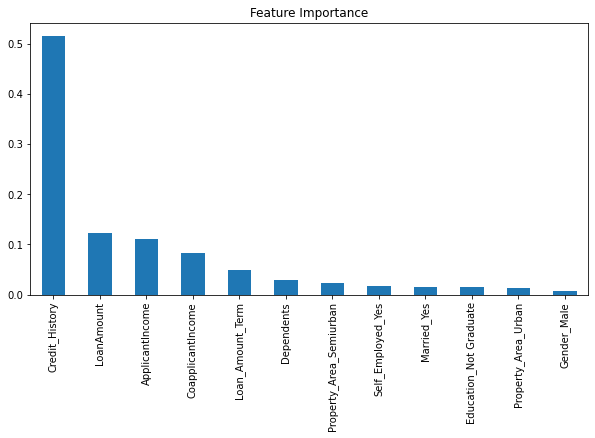

In [48]:
#ploting features in order of importance
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5),title='Feature Importance')

SVC

In [55]:
pipelineSVC = make_pipeline(StandardScaler(), SVC(random_state=1))

# Create the parameter grid
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }]


In [56]:
# Create an instance of GridSearch Cross-validation estimator
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)

In [57]:
# Train the SVM classifier
gsSVC.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                         10.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [58]:
# Print the training score of the best model
print(gsSVC.best_score_)

0.8043478260869564


In [61]:
# print the model parameters of the best model
print(gsSVC.best_params_)

{'svc__C': 0.01, 'svc__kernel': 'linear'}
